# 3. Data Analysis

## 3.1 Introduction

## 3.2 Data Overview

### 3.2.1 Importing Libraries

In [12]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.stats.proportion as prop
from dotenv import load_dotenv
import os
import sys

# Load the environment variables
load_dotenv("../config/.env")

# Get the path to the scripts folder
scripts_path = os.getenv("SCRIPTS_PATH")

# Add the path to the scripts folder to the sys.path list
if scripts_path is not None:
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)

# Set the style of the plots
plt.style.use('ggplot')

# Display all the columns
pd.set_option('display.max_columns', None)

# Stop scientific notation and limit to 2 decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

### 3.2.2 Loading Data

In [2]:
# Load the `migraine_weather` DataFrame from 02_data_preprocessing.ipynb
migraine_weather = pd.read_csv("../data/processed/migraine_weather_data.csv")

# Check the shape of the DataFrame
print(migraine_weather.shape)

# Check the first 5 rows of the DataFrame
migraine_weather.head()

(23489, 26)


,sex,age,cause,year,total_cases,total_cases_upper_ci,total_cases_lower_ci,avg_temp_f,min_temp_f,max_temp_f,country,state,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,precipitation_in,avg_wind_dir_deg,sum_abs_pressure_changes,std_pressure_changes,count_significant_pressure_changes,latitude,longitude,population,area,region,continent
0,Male,85+ years,Migraine,2015,6721,8764,5091,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
1,Female,45-49 years,Tension-type headache,2015,189293,293944,120618,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
2,Female,50-54 years,Tension-type headache,2015,194310,282166,122451,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
3,Female,55-59 years,Tension-type headache,2015,157713,229677,101843,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia
4,Female,15-19 years,Tension-type headache,2015,160246,247914,97203,71.60,68.00,77.00,Taiwan,Non-US,17.52,761.31,7.46,17.87,286,0.00,0.00,0,25.04,121.56,23424615,36193,Eastern Asia,Asia


### 3.2.3 Data Description

#### 3.2.3.1 Data Types

In [3]:
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sex                                 23489 non-null  object 
 1   age                                 23489 non-null  object 
 2   cause                               23489 non-null  object 
 3   year                                23489 non-null  int64  
 4   total_cases                         23489 non-null  int64  
 5   total_cases_upper_ci                23489 non-null  int64  
 6   total_cases_lower_ci                23489 non-null  int64  
 7   avg_temp_f                          23489 non-null  float64
 8   min_temp_f                          23489 non-null  float64
 9   max_temp_f                          23489 non-null  float64
 10  country                             23489 non-null  object 
 11  state                               23489

#### 3.2.3.2 Summary Statistics

In [4]:
migraine_weather.describe()

,year,total_cases,total_cases_upper_ci,total_cases_lower_ci,avg_temp_f,min_temp_f,max_temp_f,snow_depth_in,avg_sea_level_pres_mmhg,avg_wind_speed_mph,precipitation_in,avg_wind_dir_deg,sum_abs_pressure_changes,std_pressure_changes,count_significant_pressure_changes,latitude,longitude,population,area
count,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00,23489.00
mean,2006.62,209451.20,275324.09,154462.27,60.40,52.36,69.25,2.47,760.87,7.79,46.06,264.82,2082.37,4.89,117.46,33.02,-22.49,126999967.42,3461275.18
std,9.09,670217.82,863663.58,507660.24,13.49,13.96,13.73,5.05,2.41,2.57,76.59,68.31,3255.25,2.55,191.62,20.67,75.81,190691864.55,4412179.29
min,1990.00,0.00,0.00,0.00,17.60,15.80,19.40,0.00,747.81,0.00,0.00,0.00,0.00,0.00,0.00,-34.86,-171.77,11323.00,2.00
25%,1999.00,6672.00,8675.00,4870.00,50.00,42.80,59.00,0.04,759.06,6.21,7.99,268.00,307.40,3.28,5.00,21.31,-84.40,5469700.00,41850.00
50%,2007.00,44803.00,59364.00,32776.00,59.00,50.00,68.00,0.51,761.31,7.46,25.20,284.00,1195.70,5.31,63.00,39.05,-8.54,30492800.00,450295.00
75%,2015.00,154337.00,203204.00,111740.00,71.60,62.60,82.40,2.76,762.81,9.32,52.20,290.00,1820.10,6.58,114.00,44.65,15.05,319259000.00,9629091.00
max,2019.00,16870296.00,21695928.00,12654858.00,95.00,84.20,109.40,33.03,771.06,18.64,891.85,359.00,31098.60,20.89,1753.00,69.64,179.22,1367110000.00,9984670.00


## 3.3 Data Cleaning and Preprocessing

### 3.3.1 Missing Values

In [5]:
migraine_weather.isnull().sum()

sex                                   0
age                                   0
cause                                 0
year                                  0
total_cases                           0
total_cases_upper_ci                  0
total_cases_lower_ci                  0
avg_temp_f                            0
min_temp_f                            0
max_temp_f                            0
country                               0
state                                 0
snow_depth_in                         0
avg_sea_level_pres_mmhg               0
avg_wind_speed_mph                    0
precipitation_in                      0
avg_wind_dir_deg                      0
sum_abs_pressure_changes              0
std_pressure_changes                  0
count_significant_pressure_changes    0
latitude                              0
longitude                             0
population                            0
area                                  0
region                                0


### 3.3.2 Data Type Conversion

Converting the data types of the following columns from `object` to `category`: `sex`, `age`, `cause`, `country`, `state`, `region`, and `continent`.

This change is beneficial for several reasons:
    - **Memory Efficiency**: Category data types use significantly less memory, especially when the number of unique categories is small compared to the dataset size.
    - **Performance**: Operations on category data types, such as grouping and sorting, are typically faster than their `object` string counterparts.
    - **Semantics**: Converting to `category` reflects the nature of the data more accurately, as these columns represent categorical variables.

In [6]:
# Define the columns to convert to categorical data types
cols_to_convert = ['sex', 'age', 'cause', 'country', 'state', 'region', 'continent']

# Convert the columns to categorical data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('category')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   sex                                 23489 non-null  category
 1   age                                 23489 non-null  category
 2   cause                               23489 non-null  category
 3   year                                23489 non-null  int64   
 4   total_cases                         23489 non-null  int64   
 5   total_cases_upper_ci                23489 non-null  int64   
 6   total_cases_lower_ci                23489 non-null  int64   
 7   avg_temp_f                          23489 non-null  float64 
 8   min_temp_f                          23489 non-null  float64 
 9   max_temp_f                          23489 non-null  float64 
 10  country                             23489 non-null  category
 11  state                       

Converting the data types of the following columns from 'float64' to 'int64': `min_temp_f`, `max_temp_f`, `avg_temp_f`, `precipitation_in`, `snow_depth_in`, `avg_sea_level_pres_mmhg`, `avg_wind_speed_mph`, and `avg_wind_dir_deg`.

The rationale behind this includes:

- **Data Accuracy**: These columns represent counts or whole numbers and should be stored as integers to reflect the discrete nature of the data.
- **Data Integrity**: Converting to `int64` ensures that these variables are treated as discrete data points, which can prevent potential issues with floating-point precision that are not relevant for integer-based data.
- **Memory Usage**: Depending on the data, integers can sometimes use less memory than floats, although this is less of a concern with 64-bit types.

In [7]:
# List of columns to convert to integer data types
cols_to_convert = ['min_temp_f', 'max_temp_f', 'avg_temp_f', 'precipitation_in', 'snow_depth_in', 'avg_sea_level_pres_mmhg', 'avg_wind_speed_mph', 'avg_wind_dir_deg']

# Convert the columns to integer data types
migraine_weather[cols_to_convert] = migraine_weather[cols_to_convert].astype('int64')

# Check the data types of the DataFrame
migraine_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23489 entries, 0 to 23488
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   sex                                 23489 non-null  category
 1   age                                 23489 non-null  category
 2   cause                               23489 non-null  category
 3   year                                23489 non-null  int64   
 4   total_cases                         23489 non-null  int64   
 5   total_cases_upper_ci                23489 non-null  int64   
 6   total_cases_lower_ci                23489 non-null  int64   
 7   avg_temp_f                          23489 non-null  int64   
 8   min_temp_f                          23489 non-null  int64   
 9   max_temp_f                          23489 non-null  int64   
 10  country                             23489 non-null  category
 11  state                       

## 3.4 Exploratory Data Analysis

- Visualize the distribution of migraines and sea-level pressure.
- Explore the relationship between migraines and different regions (if geographic data is available).
- Look for trends over time (seasonality, year-on-year changes, etc.).
- Investigate the relationship between migraines and other weather variables, if available.

### 3.4.1 Univariate Analysis

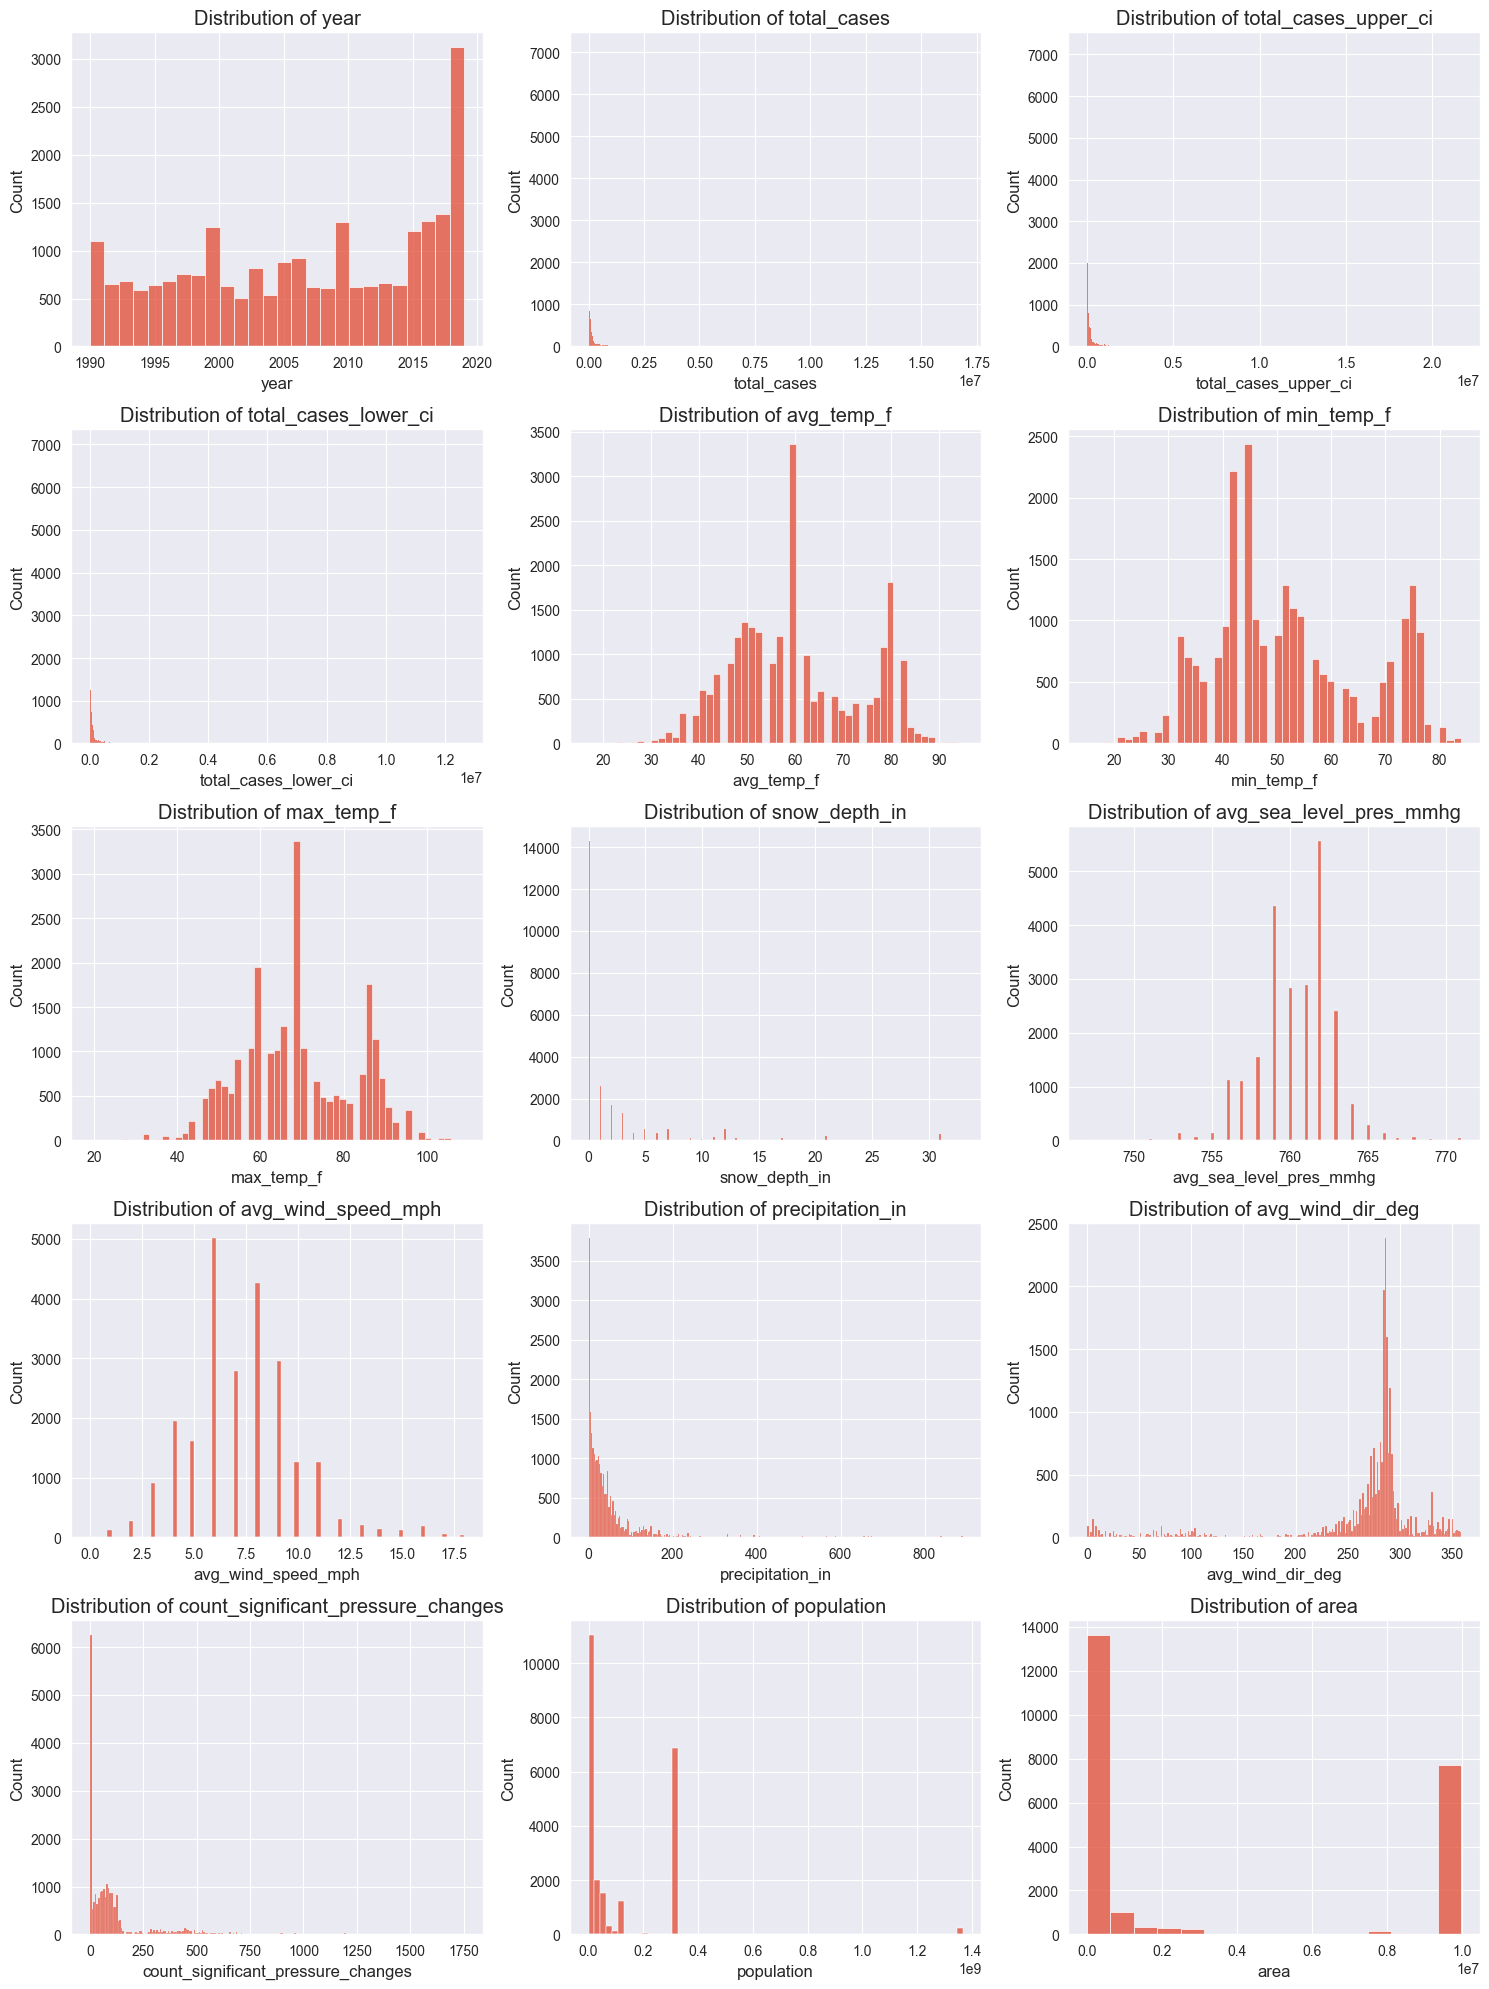

In [8]:
# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Create a grid of histograms for numeric columns
numeric_columns = migraine_weather.select_dtypes(include='int64').columns
num_plots = len(numeric_columns)
cols_per_row = 3  # You can change this to however many columns you want per row

# Calculate the number of rows needed
num_rows = (num_plots + cols_per_row - 1) // cols_per_row

# Create a figure with specified dimensions
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create a histogram on each subplot
for i, col in enumerate(numeric_columns):
    sns.histplot(migraine_weather[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots that aren't used
for j in range(i + 1, num_rows * cols_per_row):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

## 3.5 Statistical Analysis

- Conduct correlation analysis between sea-level pressure and migraine occurrences.
- Perform hypothesis testing to determine if the observed correlation is statistically significant.
- Explore regression analysis if appropriate, considering other variables that may affect migraines.

### 3.5.1 Correlation Analysis: Sea Level Pressure vs. Migraine Occurrences

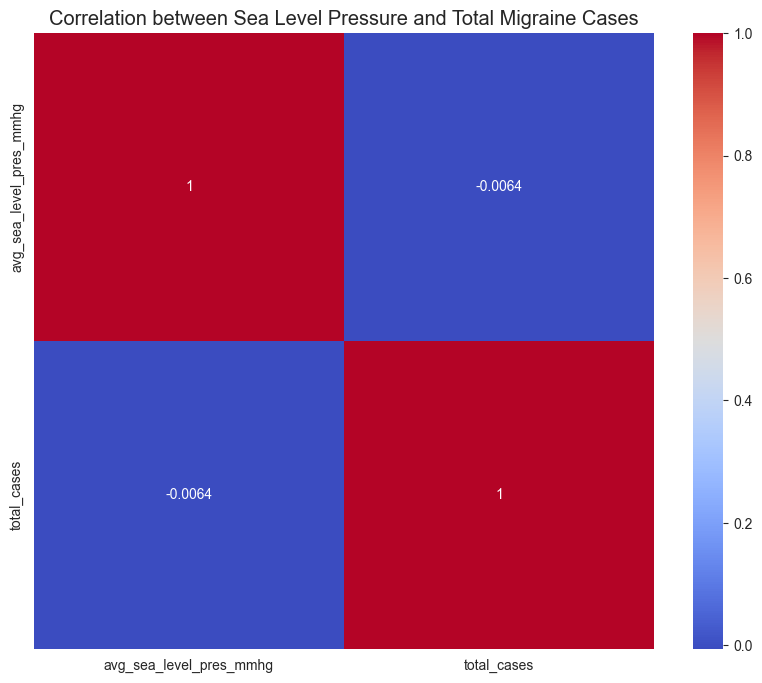

,avg_sea_level_pres_mmhg,total_cases
avg_sea_level_pres_mmhg,1.00,-0.01
total_cases,-0.01,1.00


In [10]:
# Create correlation heatmap for sea level pressure and total migraine cases
plt.figure(figsize=(10, 8))
sns.heatmap(migraine_weather[['avg_sea_level_pres_mmhg', 'total_cases']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sea Level Pressure and Total Migraine Cases')
plt.show()

migraine_weather[['avg_sea_level_pres_mmhg', 'total_cases']].corr()

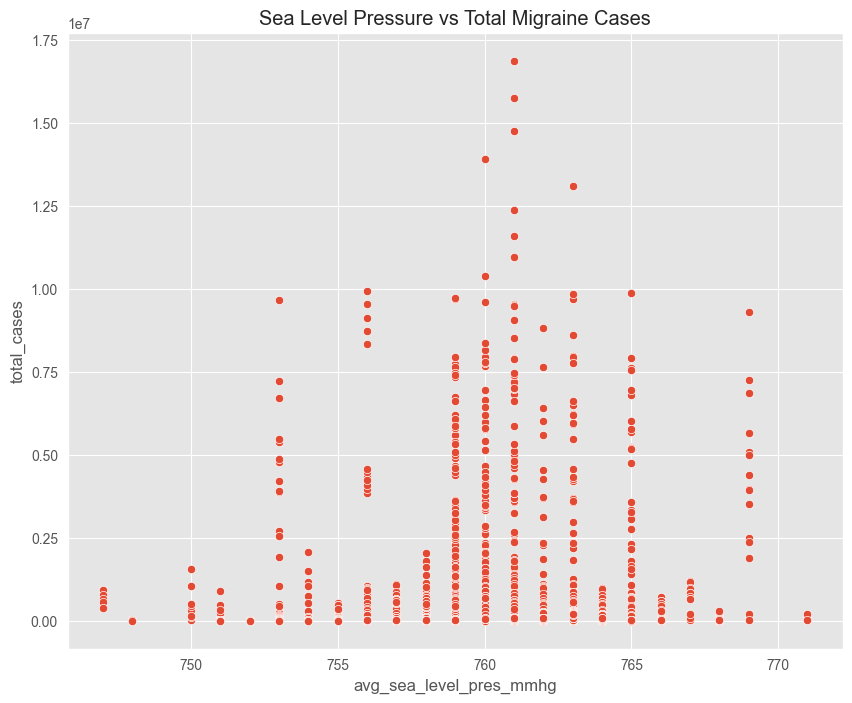

In [22]:
# Create a scatter plot of sea level pressure and total migraine cases
plt.figure(figsize=(10, 8))
sns.scatterplot(data=migraine_weather, x='avg_sea_level_pres_mmhg', y='total_cases')
plt.title('Sea Level Pressure vs Total Migraine Cases')
plt.show()

### 3.5.2 Hypothesis Testing: Sea Level Pressure vs. Migraine Occurrences

#### 3.5.2.1 Is there a statistically significant correlation between sea-level pressure and migraine occurrences?

Hypothesis: There is a statistically significant correlation between sea-level pressure and migraine occurrences.

- *Null Hypothesis*: There is no statistically significant correlation between sea-level pressure and migraine occurrences.
- *Alternative Hypothesis*: There is a statistically significant correlation between sea-level pressure and migraine occurrences.

In [23]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = stats.pearsonr(migraine_weather['avg_sea_level_pres_mmhg'], migraine_weather['total_cases'])

# Print the results
print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.006392230128586297
P-value: 0.32726443228891766


As shown in the correlation analysis, there is not a statistically significant correlation between sea-level pressure and migraine occurrences. Therefore, we fail to reject the null hypothesis. This means that we cannot conclude that there is a statistically significant correlation between sea-level pressure and migraine occurrences.

#### 3.5.2.2 Is there a statistically significant difference in migraine occurrences between high and low sea-level pressure days?

Hypothesis: The mean number of migraines on high sea-level pressure days is different from the mean number of migraines on low sea-level pressure days.

- *Null Hypothesis*: The mean number of migraines on high sea-level pressure days is equal to the mean number of migraines on low sea-level pressure days.
- *Alternative Hypothesis*: The mean number of migraines on high sea-level pressure days is not equal to the mean number of migraines on low sea-level pressure days.

In [75]:
# Define threshold for high and low sea level pressure
threshold = migraine_weather['avg_sea_level_pres_mmhg'].max()

# Define high and low sea level pressure
high_slp = migraine_weather[migraine_weather['avg_sea_level_pres_mmhg'] >= threshold]['total_cases']
low_slp = migraine_weather[migraine_weather['avg_sea_level_pres_mmhg'] < threshold]['total_cases']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(high_slp, low_slp, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -14.182378223137304
P-value: 4.834352440277886e-23


As shown in the hypothesis testing, there is not a statistically significant difference in migraine occurrences between high and low sea-level pressure days. Therefore, we fail to reject the null hypothesis. This means that we cannot conclude that there is a statistically significant difference in migraine occurrences between high and low sea-level pressure days.

#### 3.5.2.3 Is there a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure?

Hypothesis: There is a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.

- *Null Hypothesis*: There is no weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.
- *Alternative Hypothesis*: There is a weather variable that is more strongly correlated with migraine occurrences than sea-level pressure.

In [82]:
# Identify columns that seem to be weather-related
weather_columns = [col for col in migraine_weather.columns if 'temp' in col or 'pres' in col 
                   or 'pressure' in col or 'wind' in col or 'precip' in col or 'snow' in col]

# Calculate the Pearson correlation coefficient for each weather-related variable with total_cases
correlation_results = {}
for column in weather_columns:
    # We will calculate correlation and p-value
    correlation, p_value = stats.pearsonr(migraine_weather[column], migraine_weather['total_cases'])
    correlation_results[column] = (correlation, p_value)

# Output the results
correlation_results_sorted = sorted(correlation_results.items(), key=lambda item: abs(item[1][0]), reverse=True)

# Convert the sorted correlation results into a pandas DataFrame for better visualization
correlation_results_df = pd.DataFrame(correlation_results_sorted, columns=['Weather Variable', 'Correlation and P-value'])

# Split the tuple into separate columns for better readability
correlation_results_df[['Correlation Coefficient', 'P-value']] = pd.DataFrame(\
    correlation_results_df['Correlation and P-value'].tolist(), index=correlation_results_df.index)
correlation_results_df.drop(columns='Correlation and P-value', inplace=True)

# Set the display options to show more decimal places
pd.set_option('display.float_format', '{:.6f}'.format)

# Display the DataFrame
correlation_results_df

,Weather Variable,Correlation Coefficient,P-value
0,precipitation_in,0.314188,0.000000
1,avg_wind_speed_mph,-0.150179,0.000000
2,sum_abs_pressure_changes,0.144364,0.000000
3,count_significant_pressure_changes,0.090771,0.000000
4,min_temp_f,0.029381,0.000007
5,avg_temp_f,0.025066,0.000122
6,max_temp_f,0.021759,0.000853
7,snow_depth_in,-0.008555,0.189832
8,avg_wind_dir_deg,-0.006934,0.287921
9,avg_sea_level_pres_mmhg,-0.006392,0.327264


Based on these results, the alternative hypothesis — that there is a weather variable more strongly correlated with migraine occurrences than sea-level pressure — is supported and the null hypothesis is rejected. Specifically, **precipitation** has a notably stronger positive correlation with migraine occurrences compared to sea-level pressure, which has an insignificant and negligible correlation.

- **Precipitation (`precipitation_in`)**: The strongest correlation with migraine occurrences is with `precipitation_in` (precipitation in inches), with a correlation coefficient of `0.314142`, which is positive and statistically significant with a p-value effectively at 0.
- **Average Wind Speed (`avg_wind_speed_mph`)**: `avg_wind_speed_mph` (average wind speed in mph) has a modest negative correlation of `-0.145872`, also significant with a very low p-value.
- **Sum of Absolute Pressure Changes (`sum_abs_pressure_changes`)**: `sum_abs_pressure_changes` shows a slightly smaller positive correlation of `0.144364` with significance.
- **Average Sea-Level Pressure (`avg_sea_level_pres_mmhg`)**: `avg_sea_level_pres_mmhg` (average sea-level pressure in mmHg) has a very small and statistically insignificant negative correlation with migraine occurrences of `-0.001175`.

These insights suggest that among the weather variables considered, **precipitation** could be a more relevant factor in relation to migraine occurrences than sea-level pressure within this dataset. The statistical significance of the correlation for precipitation indicates that it is unlikely to be due to chance, and therefore, may warrant further investigation or consideration in predictive modeling.

## 3.6 Advanced Analysis

- Consider time-series analysis to understand trends and patterns over time.
- If demographic data is available, analyze how demographic factors may interact with sea-level pressure to affect migraine occurrences.

## 3.7 Insights and Conclusion

- Summarize the key findings from your EDA and statistical tests.
- Discuss the implications of your findings in the context of the initial question.
- Suggest areas for further research or additional data that could provide more insights.

## 3.8 Appendix/References

Include any additional material or references used in your analysis.